### Perceptron Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
np.random.seed(42)

In [2]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

In [3]:
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [4]:
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat=prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0]=W[0]+ (X[i][0]*learn_rate)
            W[1]=W[1]+(X[i][1]*learn_rate )
            b=b+learn_rate 
        elif y[i] - y_hat == -1:
            W[0]=W[0]-(X[i][0]*learn_rate)
            W[1]=W[1]-(X[i][1]*learn_rate )
            b=b-learn_rate 
    return W, b

In [5]:
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [6]:
df=pd.read_csv('data.csv',header=None)
df.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [7]:
X=df.iloc[:,:2].values.reshape(-1,2)
y=df.iloc[:,2].values.reshape(-1,1)
boundary_lines=trainPerceptronAlgorithm(X,y)

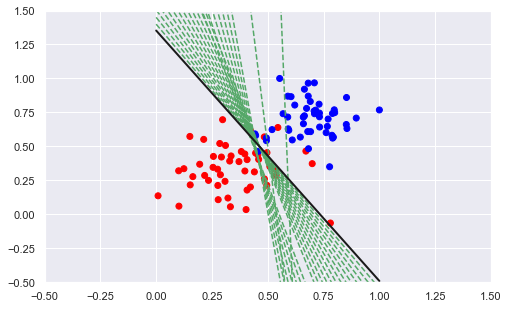

In [8]:
x_lin = np.linspace(0, 1, 10)
color = ['red' if value == 1 else 'blue' for value in y]
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.scatter(X[:,0], X[:,1], marker='o', color=color)
for i, line in enumerate(boundary_lines):
    Θo, Θ1  = line
    if i == len(boundary_lines) - 1:
        c, ls, lw = 'k', '-', 2
    else:
        c, ls, lw = 'g', '--', 1.5
    ax.plot(x_lin, Θo * x_lin + Θ1, c=c, ls=ls, lw=lw)
plt.show()